In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append("..") # Adds higher directory to python modules path.
import branchingdnn as branching

Graph building for the brevis net results

---
Values to measure: 
    1. Model Overall Accuracy
    2. Model Overall Performance
    3. Model memory impact?

---
Graph To Build:
    1. a Comparasion graph of the before/after of the accuracy/performance for each model/variant
        Build as a bar graph? potentially either a stacked graph or a double edged line graph
    2.

In [2]:
K = 10
def loss_function(annealing_rate=1, momentum=1, decay=1, global_loss=False):
    #create a wrapper function that returns a function
    temperature = 1
    Classes = 10
    keras_kl = tf.keras.losses.KLDivergence()
    annealing_rate = annealing_rate
    momentum_rate = momentum
    decay_rate = decay
    def cross_entropy_evidence(labels, outputs): 
        softmax = tf.nn.softmax(outputs)
        # activated_outputs =tf.keras.activations.sigmoid(softmax)
        evidence = softplus_evidence(outputs)
        alpha = evidence + 1
        S = tf.reduce_sum(alpha, axis=1, keepdims=True) 
        E = alpha - 1
        m = alpha / S
        A = tf.reduce_sum((labels-m)**2, axis=1, keepdims=True) 
        B = tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True) 

        annealing_coef = tf.minimum(1.0,tf.cast(annealing_rate,tf.float32))
#         annealing_coef = 1
        alp = E*(1-labels) + 1 
        # print("alp", alp)
        C =  annealing_coef * KL(alp)
        # C = keras_kl(labels,evidence)
        loss = tf.keras.losses.categorical_crossentropy(labels, softmax)
        pred = tf.argmax(outputs,1)
        truth = tf.argmax(labels,1)
        match = tf.reshape(tf.cast(tf.equal(pred, truth), tf.float32),(-1,1))
        return loss + C
        # return (A + B) + C
    return  cross_entropy_evidence


In [3]:
dataset = branching.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(224,224), include_targets=True)


KeyboardInterrupt: 

In [4]:
# base_model = tf.keras.applications.MobileNetV2(
#     input_shape=(224,224,3),
#     alpha=1.0,
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     pooling="avg",
# )


# x = base_model.output
# # x = tf.keras.layers.Dense(1024, activation="relu")(x)
# # x = tf.keras.layers.Dense(512, activation="relu")(x)
# x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)

# model = tf.keras.models.Model(inputs=base_model.input, outputs=x)


# model.compile(optimizer='SGD', 
#                 loss='categorical_crossentropy',
#                 metrics = ['accuracy'])

In [5]:
# train_ds, test_ds, validation_ds = branching.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(224,224), include_targets=False)

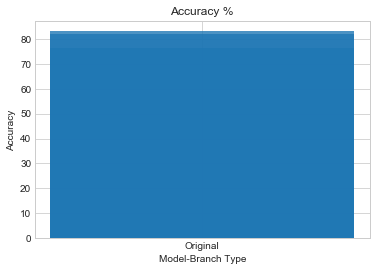

In [6]:
Accuracies = [83.05,76.42,81.80]
Labels = ["Original"]
plt.bar( Labels,Accuracies,alpha=0.8) 

# plt.xticks()
plt.title("Accuracy %")
plt.ylabel("Accuracy")
plt.xlabel("Model-Branch Type")
plt.show()

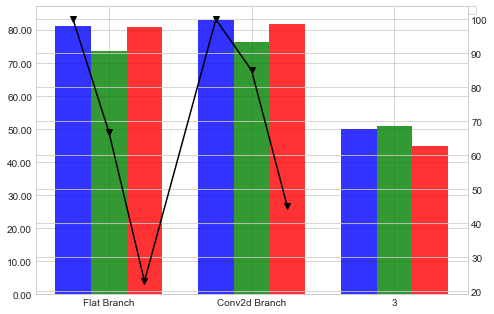

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
data = [[81.26, 83.05, 50 ],
[73.67, 76.42, 51 ],
[81.04, 81.80, 45 ]]
X_ = ["Flat Branch","Conv2d Branch","3",]
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(X)
ax.set_xticklabels(X_)
# ax.set_xticks([0,2,4,6])

lineX_ = [0-0.25,0,0+.25, 1-0.25,1,1+.25, ] #2-0.25,2,2+.25
lineData=[100,67,23,100,85,45]

ax.bar(X-0.25, data[0], color = 'b', width = 0.25, alpha=0.8)
ax.bar(X, data[1], color = 'g', width = 0.25,alpha=0.8)
ax.bar(X+0.25, data[2], color = 'r', width = 0.25,alpha=0.8)

ax2 = ax.twinx()
ax2.plot(lineX_,lineData, color='black',marker="v")

fig.legend = ["test","test2"]
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axLine, axLabel = ax.get_legend_handles_labels()
lines=(axLine)
labels=(axLabel)

ax.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[81.26, 83.05, 50 ],
[73.67, 76.42, 51 ],
[81.04, 81.80, 45 ]]
X_ = ["Original","Conv2d Branch","3",]
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(X)
ax.set_xticklabels(X_)
# ax.set_xticks([0,2,4,6])

lineX_ = [0-0.25,0,0+.25, 1-0.25,1,1+.25, ] #2-0.25,2,2+.25
lineData=[0.0,67,23,0.0,85,45]

ax.bar(X-0.25, data[0], color = 'b', width = 0.25, alpha=0.8)
ax.bar(X, data[1], color = 'g', width = 0.25,alpha=0.8)
ax.bar(X+0.25, data[2], color = 'r', width = 0.25,alpha=0.8)

ax.plot(lineX_,lineData, color='black')
ax.legend = ["test","test2"]

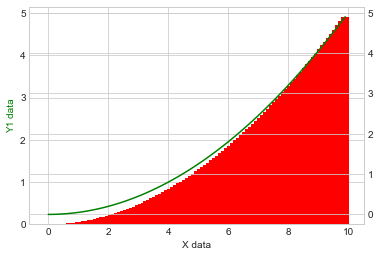

In [38]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(x, y1, 'g-')
ax1.bar(x, y1, color = 'r', width = 0.25)

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
# ax2.set_ylabel('Y2 data', color='b')

plt.show()

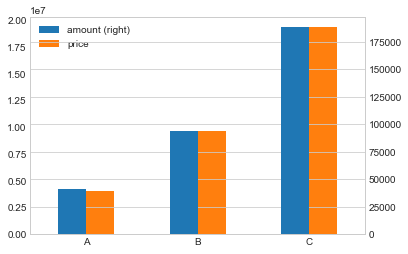

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     amount     price
A     40929   4066443
B     93904   9611272
C    188349  19360005
""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

_ = df.plot( kind= 'bar' , secondary_y= 'amount' , rot= 0 )
plt.show()